In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip -O /content/horse-or-human.zip
!wget https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip -O /content/validation-horse-or-human.zip

--2025-04-15 20:09:43--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 74.125.68.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M  23.6MB/s    in 7.6s    

2025-04-15 20:09:51 (18.9 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]

--2025-04-15 20:09:51--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 74.125.68.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [3]:
import os
import zipfile

## Extracting Training Dataset

In [4]:
local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human-training')
zip_ref.close()

## Extracing Validation Dataset

In [5]:
local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

## Preprocessing Data Using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = '/content/horse-or-human-training'
validation_dir = '/content/validation-horse-or-human'

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,# path to training folder
    target_size=(150, 150), # resize all images to 150x150
    batch_size=32,
    class_mode='binary' # because we have two classes
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Building From Scratch

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [22]:
model = Sequential() #Model

#CNN
#First Block
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                 input_shape=(150,150,3),
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 activation='relu', kernel_initializer = 'he_uniform',
                 padding = 'same'
                )
)
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 activation='relu', kernel_initializer = 'he_uniform',
                 padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second Block
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third Block
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Last of CNN
model.add(Flatten())
model.add(Dropout(0.25))
#---------------------------------------------------------------------
#ANN
model.add(Dense(256, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,954,561 (41.79 MB)

 Trainable params: 10,954,561 (41.79 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=8
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 869ms/step - accuracy: 0.5144 - loss: 5.8773 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4965 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.4532 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.5323 - loss: 0.6940 - val_accuracy: 0.8906 - val_loss: 0.6905
Epoch 5/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5938 - loss: 0.6898

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5938 - loss: 0.6898 - val_accuracy: 0.8047 - val_loss: 0.6895
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.5462 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6791
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.5339 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.4915 - loss: 0.6907 - val_accuracy: 0.6914 - val_loss: 0.6786
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.5477 - loss: 0.6757 - val_accuracy: 0.8047 - val_loss: 0.6600
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7500 - loss: 0.6470 - val_accuracy: 0.5469 - val_loss: 0.6737
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.6335 - loss: 0.6532 - val_accuracy: 0.5312 - val_loss: 0.7032
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 464ms/step - accuracy: 0.6558 - loss: 0.5923 - val_accuracy: 0.5000 - val_loss: 0.7673


In [10]:
x_batch, y_batch = next(train_generator)
print(x_batch.shape)  # e.g., (32, 150, 150, 3)
print(y_batch.shape)  # e.g., (32,)

(32, 150, 150, 3)
(32,)


### Plot Accuracy/Loss

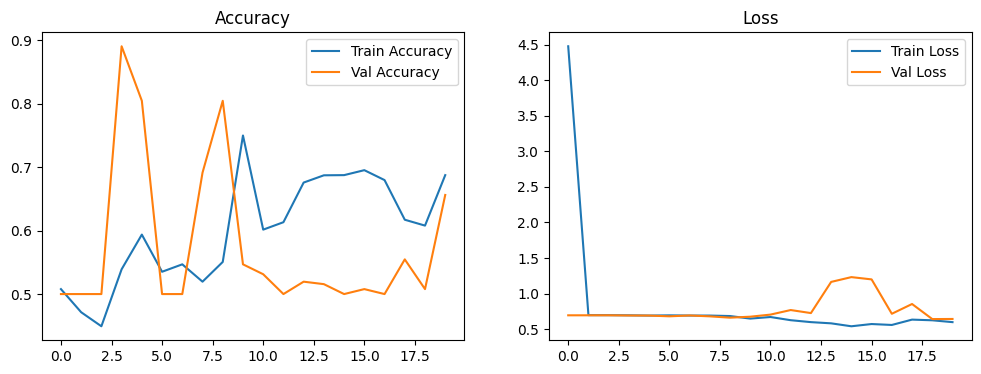

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

----

## Transfer Learning

In [12]:
from tensorflow.keras.applications import MobileNetV2

#### BackBone

In [15]:
pre_trained_model = MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights='imagenet',
    pooling = 'max'
    )

<ipython-input-15-462b658cd109>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(


In [16]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [17]:
pre_trained_model.trainable = False

In [18]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
print(len(pre_trained_model.layers))

155


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [31]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential([
    pre_trained_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_initializer = 'he_uniform'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 519ms/step - accuracy: 0.7879 - loss: 0.8820 - val_accuracy: 0.9961 - val_loss: 0.0065
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 350ms/step - accuracy: 0.9682 - loss: 0.1129 - val_accuracy: 0.9961 - val_loss: 0.0043
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.9686 - loss: 0.0916 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.9676 - loss: 0.0677 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.9792 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 5.8221e-04
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.9777 - loss: 0.0600 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 351ms/step - accuracy: 0.9685 - loss: 0.0881 - val_accuracy: 0.9922 - val_loss: 0.0136
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 351ms/step - accuracy: 0.9851 - loss: 0.0432 - val_

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,750,277 (10.49 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,196 (1.25 MB)

### Plot Accuracy/Loss

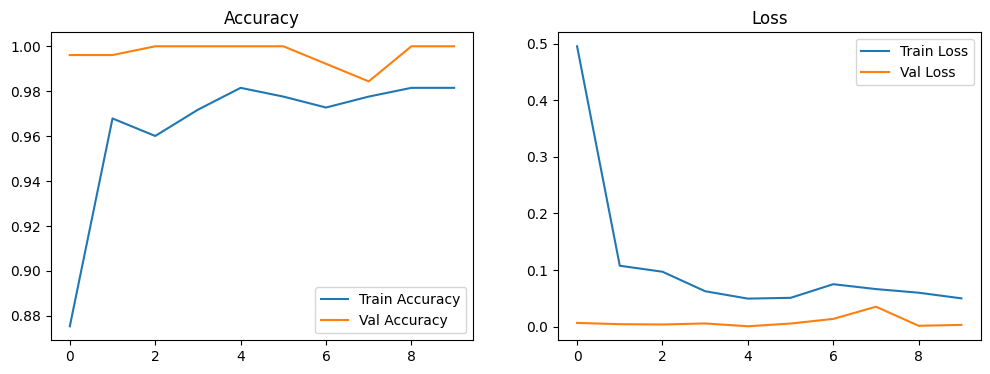

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

<br><br><br>  <!-- Creates multiple empty lines -->

## Another Way to Connect a Pretrained Model with Our Own (Functional API Explained)

### 🔁 Another Way to Connect a Pretrained Model with Our Own (Functional API Explained)

In Keras, we have two main ways to build neural networks:  
➡️ The **Sequential API**  
➡️ The **Functional API**

---

#### ✅ Sequential API (What We've Used So Far)

The Sequential API is a simple, linear stack of layers.  
You just add one layer after another using:

```python
model = Sequential([
    pre_trained_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```

#### 🚀 Functional API (More Flexible and Customizable)
The Functional API lets us manually connect layers using tensors, giving us much more flexibility.
This is especially useful when working with pretrained models like MobileNetV2:
```python
from tensorflow.keras.models import Model

last_output = pre_trained_model.output
x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=out_x)
```

### 🧠 When to Use Which?

| 🧱 Use **Sequential API** when...                           | 🧬 Use **Functional API** when...                             |
|-------------------------------------------------------------|---------------------------------------------------------------|
| ✅ You're stacking layers linearly                          | 🔀 You need complex connections (e.g., branches or skip layers) |
| ✅ You have **one input** and **one output**                | 🔄 You have **multiple inputs** or **multiple outputs**       |
| ⚡ Great for fast prototyping and simple architectures       | 🧩 Best for working with **pretrained models** flexibly       |

<br><br>  <!-- Creates multiple empty lines -->

##### ✅ TL;DR: If Sequential works, stick with it! But when your architecture grows, Functional API is your best friend.

In [37]:
from tensorflow.keras.models import Model

In [38]:
last_output = pre_trained_model.output
x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=out_x)

In [39]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [40]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 512ms/step - accuracy: 0.6837 - loss: 1.2865 - val_accuracy: 0.9961 - val_loss: 0.0180
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.9642 - loss: 0.1055 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.9761 - loss: 0.0721 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.9865 - loss: 0.0446 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 358ms/step - accuracy: 0.9803 - loss: 0.0513 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.9849 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.9923 - loss: 0.0292 - val_accu

### Plot Accuracy/Loss

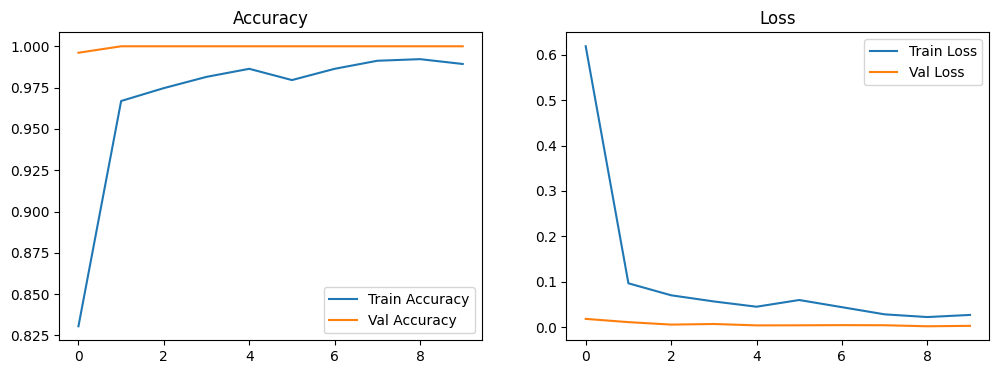

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()